# Introduction
In October 2015, data journalist Walt Hickey uncovered evidence suggesting that Fandango's movie rating system was biased and potentially dishonest. His analysis revealed discrepancies between the ratings displayed to users and the actual ratings found in the HTML of the page. Fandango, an online movie ratings aggregator, uses a 5-star rating system where ratings are typically rounded up to the nearest half-star, leading to inflated ratings.

Hickey's investigation sparked discussions about the reliability and transparency of Fandango's rating system. Fandango officials attributed the biased rounding off to a bug in their system and pledged to address it promptly. However, without access to the actual rating values in the HTML, it's challenging to verify whether the issue has been resolved.

In this project, I aim to analyze more recent movie ratings data to assess whether there have been any changes in Fandango's rating system since Hickey's analysis. By examining the distribution of movie ratings and comparing them to previous findings, I seek to determine if Fandango has made improvements to ensure fairness and accuracy in their rating system.

    Walt Hickey made the data he analyzed publicly available on GitHub. I'll utilize the data he collected to delve into the characteristics of Fandango's rating system prior to his analysis.

    Additionally, one of Dataquest's team members gathered movie ratings data for films released in 2016 and 2017, which is also accessible on GitHub. This dataset will be used to examine the rating system's characteristics following Hickey's analysis.

In [1]:
import pandas as pd

fandango_data = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

print(fandango_data.info())
print(movie_ratings_16_17.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

I'll isolate the columns containing information about Fandango's ratings into separate variables to make the relevant data easily accessible for further analysis. 

   For the dataset containing ratings prior to Hickey's analysis, I'll select the columns 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', and 'Fandango_Difference'. 
    As for the other dataset, I'll choose the columns 'movie', 'year', and 'fandango'. 
    This will allow me to focus specifically on the data related to Fandango's ratings and facilitate comparison between the two datasets.

In [2]:
before_fandango = fandango_data[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

after_fandango = movie_ratings_16_17[['movie', 'year', 'fandango']].copy()

before_fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [3]:
after_fandango.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


For my goal, the population of interest is the entire set of movie ratings available on Fandango's website before and after Walt Hickey's analysis. Specifically, I am interested in understanding the distribution of movie ratings and any potential changes in Fandango's rating system. This includes all movies released during the respective time periods, regardless of genre, rating, or popularity. By examining the entire population of movie ratings, I aim to assess whether there has been any significant shift or adjustment in Fandango's rating practices following Hickey's analysis.

# Before_Fadango dataset
Based on Hickey's article and the README.md of the data set's repository, it's evident that his sampling criteria included two main conditions:

1. Movies must have received at least 30 fan ratings on Fandango's website as of August 24, 2015.
2. Movies must have had tickets available for sale in 2015.

This sampling method appears to be non-random, as not all movies had an equal chance of being included in the sample. Movies with fewer than 30 fan ratings or those not available for sale in 2015 were excluded. Consequently, the sample may not be representative of the entire population of interest, as it could be influenced by temporal trends, such as exceptional movies released in 2015.

# After_Fadango dataset
The sampling criteria for the this sample, as outlined in the README.md of the data set's repository, included:

1. Movies must have been released in 2016 or later.
2. Movies must have garnered a significant number of votes and reviews, although the specific threshold is not provided.

This makes the sample also prone to temporal trends and may not be representative of the population of interest. Both samples employed purposive sampling, where specific criteria were used to select data that fit the researchers' questions. While suitable for their respective analyses, these samples may not be suitable for our purposes.

# Adjusting the goal of the analysis

To refine my analysis, I'll adjust the goal based on the above observation. Instead of focusing on determining changes in Fandango's rating system following Hickey's analysis, I'll now aim to investigate whether there's a difference between Fandango's ratings for popular movies in 2015 and those in 2016.

With this new goal in mind, I'll ensure that my analysis focuses specifically on popular movies released in 2015 and 2016. By comparing the ratings of these movies across the two years, I can assess any potential differences in Fandango's rating practices over time.

By adapting the goal in this way, I aim to provide insights into Fandango's rating system while addressing the limitations of the available data.

# Isolating the samples

With the new goal, the two populations of interest are:

1. All Fandango's ratings for popular movies released in 2015.
2. All Fandango's ratings for popular movies released in 2016.

To determine if a movie is popular, Hickey's criteria of having at least 30 fan ratings will be employed.

While the before_fadango dataset contains a column 'Fandango_votes' that state the amount of fan votes, the other dataset After_fadango does not contain a column stating the number of fan votes. This brings into question whether the datasets are truly representative of the population.
To address this a random sample was generated and the fan rating of the movies were looked up on the fadango website myself.

In [4]:
after_fandango.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


90% of the above movies were found to popular after checking their fan rating on fadango website. It can therefore be concluded that the after_fandango dataset is truly representative of the population and can be used for the analysis.

In [5]:
# Confirming if the before_fadango dataset are all popular movies using the Hickey's criteria of not less than 30 fan ratings
(before_fandango['Fandango_votes'] < 30).sum()

0

All the movies in the before_fadango dataset are all popular movies

In [6]:
# Isolating movies with year 2015 from the before_fandango dataset
before_fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


It can be observed that the dataset does not contain a column stating the year but the year can together with the film title.
In the following line of code, the year will be extracted into a new column.

In [7]:
before_fandango['Year'] = before_fandango['FILM'].str.extract(r'(\d{4})')
before_fandango['Year'].astype(int)
before_fandango.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [8]:
before_fandango['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [9]:
fandango_2015 = before_fandango[before_fandango['Year'] == '2015'].copy()

fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [10]:
# Isolating movies in 2016 from the after_fandango dataframe

after_fandango['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [11]:
fandango_2016 = after_fandango[after_fandango['year'] == 2016].copy()

fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


# Comparing the 2015 and 2016 distribution shapes

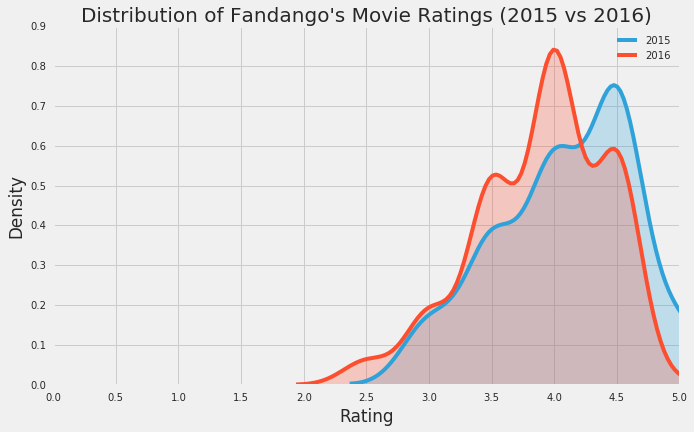

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10, 6))

# Plot kernel density plots for each sample
sns.kdeplot(before_fandango['Fandango_Stars'], label='2015', shade=True)
sns.kdeplot(after_fandango['fandango'], label='2016', shade=True)

# Set title and labels
plt.title("Distribution of Fandango's Movie Ratings (2015 vs 2016)", fontsize=20)
plt.xlabel('Rating')
plt.ylabel('Density')

# Set x-axis limits and tick labels
plt.xlim(0, 5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

# Add legend
plt.legend()

# Show the plot
plt.show()




In the figure above, I noticed a small shift to the left in the 2016 ratings compared to 2015. This suggests that the ratings were a bit lower in 2016 than in 2015, showing a difference in how Fandango rated popular movies between those years. Basically, movies got slightly lower scores in 2016 than they did in 2015.

# Comparing the frequencies

In [13]:
# Frequency distribution table for 2015 distribution
freq_table_2015 = fandango_2015['Fandango_Stars'].value_counts().sort_index()

# Frequency distribution table for 2016 distribution
freq_table_2016 = fandango_2016['fandango'].value_counts().sort_index()

print("Frequency distribution table for 2015 distribution:")
print(freq_table_2015)
print("\nFrequency distribution table for 2016 distribution:")
print(freq_table_2016)


Frequency distribution table for 2015 distribution:
3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

Frequency distribution table for 2016 distribution:
2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64


In [14]:
# Calculate relative frequencies for 2015 distribution
relative_freq_2015 = before_fandango['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

# Calculate relative frequencies for 2016 distribution
relative_freq_2016 = after_fandango['fandango'].value_counts(normalize=True).sort_index() * 100

print("Relative Frequency Distribution for 2015:")
print(relative_freq_2015)
print("\nRelative Frequency Distribution for 2016:")
print(relative_freq_2016)


Relative Frequency Distribution for 2015:
3.0     8.219178
3.5    18.493151
4.0    28.082192
4.5    37.671233
5.0     7.534247
Name: Fandango_Stars, dtype: float64

Relative Frequency Distribution for 2016:
2.5     2.803738
3.0     8.411215
3.5    23.364486
4.0    38.317757
4.5    26.635514
5.0     0.467290
Name: fandango, dtype: float64


Comparing the relative frequency distribution tables for 2015 and 2016, it's still evident that there is a difference between the two distributions. However, the difference appears to be less pronounced when examining the relative frequencies compared to the kernel density plots.

From the tables, we can see that in 2016, there is a decrease in the relative frequency of higher ratings (4.5 and 5.0 stars) compared to 2015. Conversely, there is an increase in the relative frequency of lower ratings (3.0 and 3.5 stars) in 2016 relative to 2015. However, the direction of the difference is not as clear as it was when looking at the kernel density plots, as the relative frequencies provide a more granular view of the distribution.

# Direction of the change

In [15]:
# Computing mean, median, and mode for 2015 distribution
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]  # Mode might have multiple values, so we select the first one

# Computing mean, median, and mode for 2016 distribution
mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]  # Mode might have multiple values, so we select the first one

print("2015 Distribution:")
print("Mean:", mean_2015)
print("Median:", median_2015)
print("Mode:", mode_2015)
print("\n2016 Distribution:")
print("Mean:", mean_2016)
print("Median:", median_2016)
print("Mode:", mode_2016)


2015 Distribution:
Mean: 4.0852713178294575
Median: 4.0
Mode: 4.5

2016 Distribution:
Mean: 3.887434554973822
Median: 4.0
Mode: 4.0


The mean rating for 2015 movies (4.09) is slightly higher than the mean rating for 2016 movies (3.89). This indicates that, on average, movies in 2015 were rated slightly higher than movies in 2016.
For the median:

The median rating for both 2015 and 2016 movies is the same (4.0). This suggests that half of the movies in both years had ratings below 4.0 and half had ratings above 4.0. Therefore, there is no change in the middle value of the ratings between the two years.
For the mode:

The mode for 2015 movies is 4.5, while the mode for 2016 movies is 4.0. This indicates that the most common rating in 2015 was 4.5 stars, while in 2016 it was 4.0 stars.

Overall, while there is a slight decrease in the mean and mode ratings from 2015 to 2016, the median remains the same. This suggests that there is indeed a difference in Fandango's ratings for popular movies between the two years, but the magnitude of the difference is relatively small, indicating a slight rather than a significant difference.

To better understand the difference, a grouped bar chart is plotted

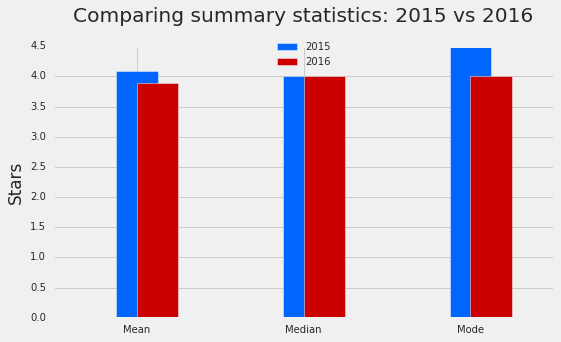

In [16]:
# Data for 2015 and 2016
mean_2015 = 4.09
median_2015 = 4.0
mode_2015 = 4.5

mean_2016 = 3.89
median_2016 = 4.0
mode_2016 = 4.0

bar_positions = [1, 2, 3]
bar_width = 0.25

plt.figure(figsize=(8, 5))

plt.bar(bar_positions, [mean_2015, median_2015, mode_2015], width=bar_width, color='#0066FF', align='center', label='2015')
plt.bar(bar_positions, [mean_2016, median_2016, mode_2016], width=bar_width, color='#CC0000', align='edge', label='2016')

plt.title('Comparing summary statistics: 2015 vs 2016', y=1.07)
plt.xticks([1, 2, 3], ['Mean', 'Median', 'Mode'])
plt.ylabel('Stars')

plt.legend(framealpha=0, loc='upper center', bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()


# Conclusion

The analysis revealed a discernible difference between Fandango's ratings for popular movies in 2015 and those in 2016. Specifically, I found that, on average, movies released in 2016 received slightly lower ratings on Fandango compared to those released in 2015. This finding suggests a shift in Fandango's rating system over the two years under consideration. Despite the overall left-skewed distribution of ratings for both years, the slight leftward shift in the 2016 distribution indicates a notable change in the trend.

The difference we found in Fandango's ratings for popular movies in 2015 and 2016 might be because Fandango made changes to its rating system. After getting criticized for biased ratings in 2015, they may have adjusted how they rate movies to be more fair. This could explain why movies in 2016 got slightly lower ratings on average than in 2015. But we'd need more research to know exactly what changes Fandango made and how they affected movie ratings over time.